In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:
data = pd.read_csv('AccidentesAviones.csv')

In [331]:
data = data.dropna(subset=['Ruta'])

In [332]:
data.head(1)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."


In [333]:
data['fecha'] = data['fecha'].astype('datetime64[ns]')

In [334]:
from datetime import datetime

data['Año'] = data['fecha'].dt.year

In [335]:
data['Ruta'] = data['Ruta'].str.replace(', ', ',')
data['Ruta'] = data['Ruta'].str.replace('Over ', '')
data['Ruta'] = data['Ruta'].str.replace('Near ', '')
data['Ruta'] = data['Ruta'].str.replace('Off ', '')

In [367]:
data['Ruta'] = data['Ruta'].str.replace('Jambol,Bulgeria', 'Jambol,Bulgaria')
data['Ruta'] = data['Ruta'].str.replace(',North Sea', '')
data['Ruta'] = data['Ruta'].str.replace('Cantonsville,Maryland', 'Catonsville,Maryland')
data['Ruta'] = data['Ruta'].str.replace('English Channel off Forkstone,Kent', 'Folkestone,Kent')
data['Ruta'] = data['Ruta'].str.replace('Catherham,Surrey,UK', 'Caterham,Surrey,UK')
data['Ruta'] = data['Ruta'].str.replace('Hillersburg,Pennsylvania', 'Millersburg,Pennsylvania')
data['Ruta'] = data['Ruta'].str.replace('Mendotta,Minnisota', 'Mendota,Minnesota')
data['Ruta'] = data['Ruta'].str.replace('Brawnson,Nebraska', 'Brownson,Nebraska')
data['Ruta'] = data['Ruta'].str.replace('La Rache,Morocco', 'LaRache,Morocco')
data['Ruta'] = data['Ruta'].str.replace('the Panama coast', 'the Panama')
data['Ruta'] = data['Ruta'].str.replace('the Gulf of Finland', 'Gulf of Finland')
data['Ruta'] = data['Ruta'].str.replace('Desertores Island Región de Los Lagos','Desertores Island')
data['Ruta'] = data['Ruta'].str.replace('Pavillon,New York', 'Pavilion,New York')
data['Ruta'] = data['Ruta'].str.replace('the coast of France', 'France')
data['Ruta'] = data['Ruta'].str.replace('Territory of New Guinea', 'New Guinea')
data['Ruta'] = data['Ruta'].str.replace('Santiago del Estado,Argentina', 'Santiago del Estero,Argentina')
data['Ruta'] = data['Ruta'].str.replace('the North Atlantic', 'North Atlantic')
data['Ruta'] = data['Ruta'].str.replace('North of San Juan,Puerto Rico', 'San Juan,Puerto Rico')
data['Ruta'] = data['Ruta'].str.replace('Barajas,Madrid,Spain', 'Barajas,Madrid,España')
data['Ruta'] = data['Ruta'].str.replace('Castell de Fels,Spain', 'CastelldeFels,Spain')
data['Ruta'] = data['Ruta'].str.replace('Santa Maria,California', 'California')
data['Ruta'] = data['Ruta'].str.replace('Tachikawa Air Base', 'Tachikawa')
data['Ruta'] = data['Ruta'].str.replace('Oran,Algeria', 'Oran,Argelia')
data['Ruta'] = data['Ruta'].str.replace('Murchinson River,Australia', 'Murchinson,Australia')
data['Ruta'] = data['Ruta'].str.replace('East Mallling,United Kingdom', 'East Malling,United Kingdom')
data['Ruta'] = data['Ruta'].str.replace('Tiflis,Georgia,USSR', 'Georgia,USSR')
data['Ruta'] = data['Ruta'].str.replace('Rossaugpt,Czechoslovakia', 'Czechoslovakia')
data['Ruta'] = data['Ruta'].str.replace('Amiens,Picrdie,France', 'Amiens,Picardie,France')
data['Ruta'] = data['Ruta'].str.replace('Jakobkondre,Suriname', 'Jacobkondre,Suriname')
data['Ruta'] = data['Ruta'].str.replace('Gustavia,St. Barthélémy,French West Indies', 'Gustavia,Francia', regex=True)
data['Ruta'] = data['Ruta'].str.replace('Jadura,Indonesia', 'Madura,Indonesia')
data['Ruta'] = data['Ruta'].str.replace('Thanh Tranh Village,Vietnam', 'Thanh,Vietnam')
data['Ruta'] = data['Ruta'].str.replace('Amiens,Picrdie,France', 'Amiens,Picardie,France')
data['Ruta'] = data['Ruta'].str.replace('Myakotino,Russia', 'Russia')
data['Ruta'] = data['Ruta'].str.replace('Chinhae,South Korea', 'Jinhae,South Korea')
data['Ruta'] = data['Ruta'].str.replace('Mugogo,Democratic Republic Congo', 'Mugogo,Congo')
data['Ruta'] = data['Ruta'].str.replace('Lajes,Terceira,Azores', 'Terceira,Azores')
data['Ruta'] = data['Ruta'].str.replace('110 miles SW of Sochi,Russia', 'Sochi,Russia')
#data['Ruta'] = data['Ruta'].str.replace('', '')
#data['Ruta'] = data['Ruta'].str.replace('', '')
#data['Ruta'] = data['Ruta'].str.replace('', '')
#data['Ruta'] = data['Ruta'].str.replace('', '')
#data['Ruta'] = data['Ruta'].str.replace('', '')
#data['Ruta'] = data['Ruta'].str.replace('', '')
#data['Ruta'] = data['Ruta'].str.replace('', '')



In [361]:
data =data.drop([4327],axis=0)

KeyError: '[4327] not found in axis'

In [368]:
mask = data[(data['Año'] > 2000) ]
mask.shape

(696, 19)

In [369]:
rutas = list(mask['Ruta'].unique())
len(rutas)


626

  6%|▋         | 40/626 [00:56<13:52,  1.42s/it]


AttributeError: 'NoneType' object has no attribute 'longitude'

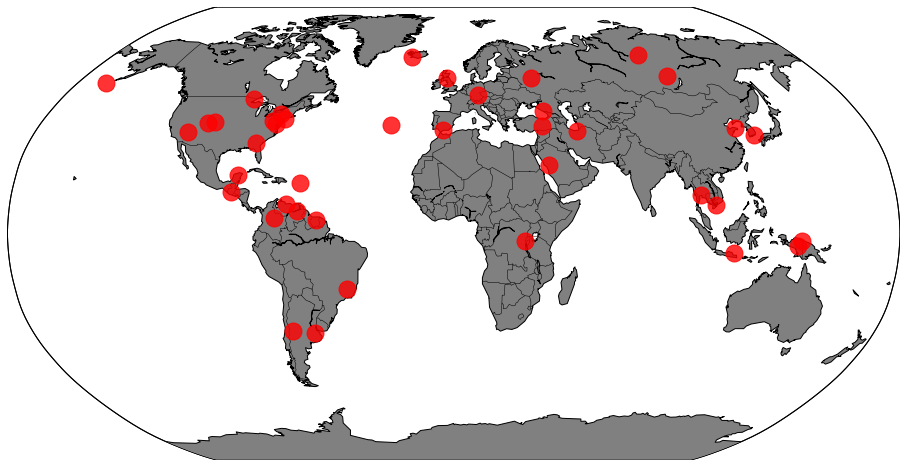

In [370]:
#Dibujar mapas
from mpl_toolkits.basemap.test import Basemap
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import time
from time import sleep
from tqdm import tqdm

geo = Nominatim(user_agent='coord', timeout=2)
lugares = rutas

#Dimensiónd de la figura
plt.figure(figsize=(16,12))

#Distribución lines costeras
eq_map=Basemap(projection='robin',lon_0=0,lat_0=0)

#Dibujar lineas costeras y paises
eq_map.drawcoastlines()
eq_map.drawcountries()

#Definir colores
eq_map.fillcontinents(color="grey")
eq_map.drawmapboundary(fill_color="white")

# Recorrer la lista de lugares
with tqdm(total=len(lugares)) as pbar:
    for i in lugares:
        address = geo.geocode(i)
        #Situo el lugar en el mapa
        x,y = eq_map(address.longitude,address.latitude)
        eq_map.plot(x,y, "ro", markersize=17, alpha=0.8)
        sleep(1)
        pbar.update(1)

In [371]:
x = rutas[40]
mask[mask['Ruta'] == x]

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,Año
4353,4353,2001-10-08,1750,"Mollet Lake,Quebec,Canada",Air Saint Maurice Inc.,?,Iyachisakus Lake - Mollet Lake,de Havilland DHC-2 Mk 1 Beaver,C-GPUO,810,7,6,1,3,2,1,0,The seaplane crashed into Mollet Lake while at...,2001


In [ ]:
geo = Nominatim(user_agent='coord')

In [378]:
loc = geo.geocode('Mollet Lake Quebec,Canada')
loc